In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import os
import gc
import neurokit2 as nk2
import sleepecg
import biosppy
import wfdb
import wfdb.processing

In [3]:
path_NORM = r'./Class01/Not Arrhythmia/NORMAL.npy'
path_ARRHYTHMIA = r'./Class01/Arrhythmia/ARRHYTHMIA.npy'


In [4]:
# Load data
NORM = np.load(path_NORM)
ARRH = np.load(path_ARRHYTHMIA)


print(NORM.shape)
print(ARRH.shape)


(13111, 5000)
(13804, 5000)


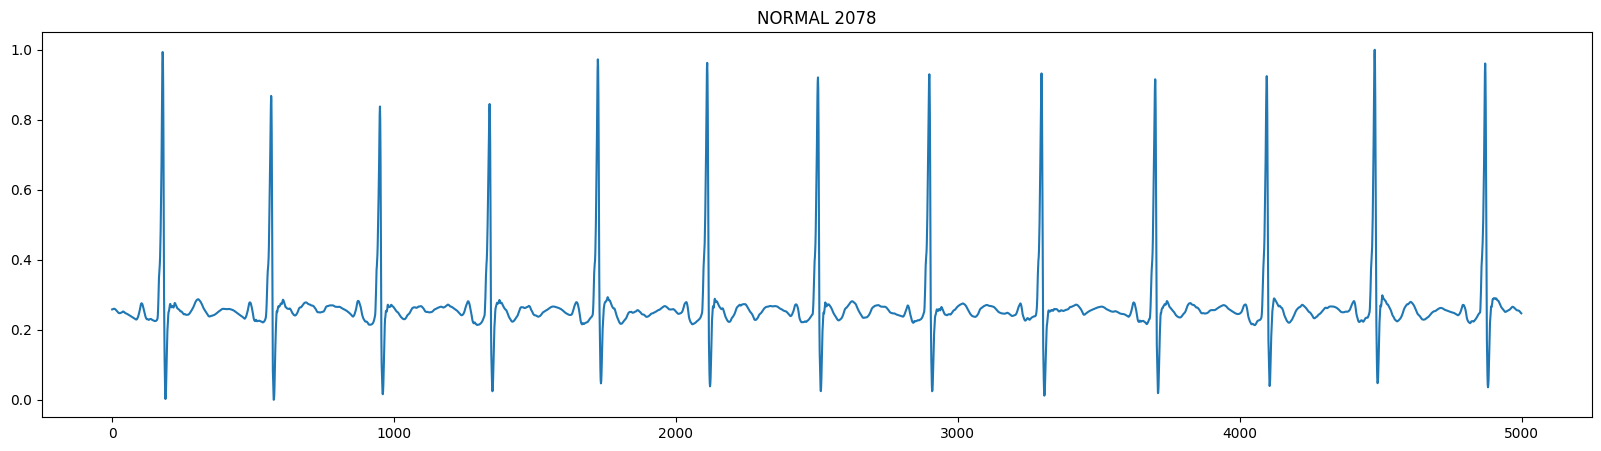

In [5]:
plt.figure(figsize=(20, 5))
k = random.randint(0, NORM.shape[0])
plt.plot(NORM[k])
plt.title(f'NORMAL {k}')
plt.show()
del k

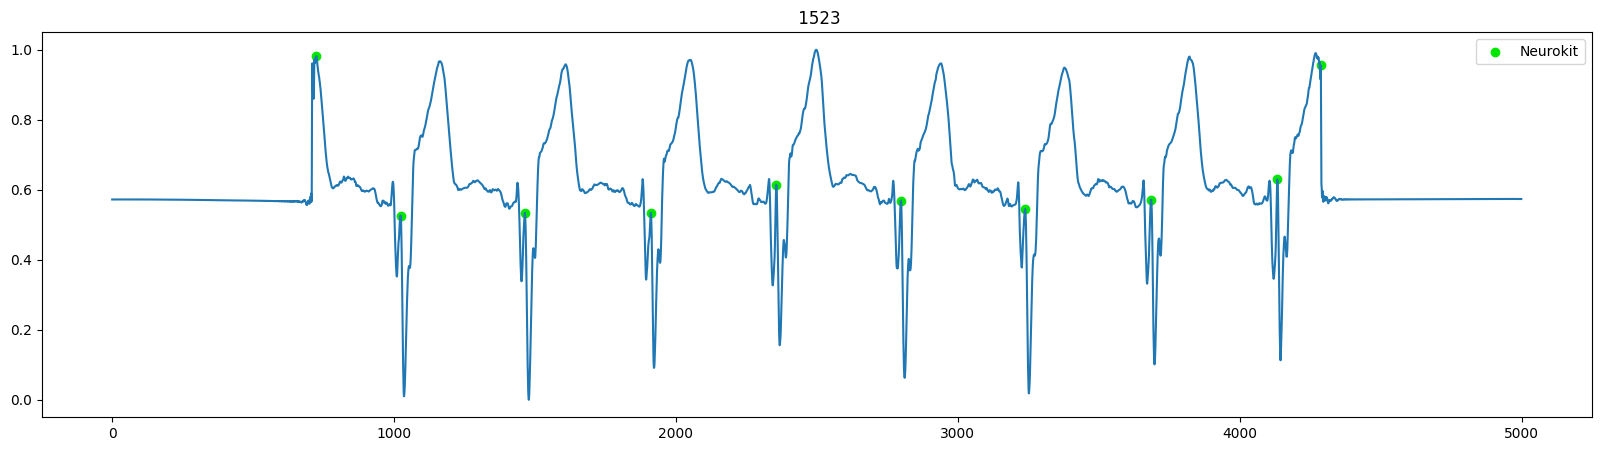

In [6]:
# R peak detection
k = random.randint(0, ARRH.shape[0])
s = ARRH[8640]
_, results = nk2.ecg_peaks(s, sampling_rate=500)
rpeaks1 = results["ECG_R_Peaks"]

plt.figure(figsize=(20, 5))
plt.title(f' {k}')

plt.plot(s)
plt.scatter(rpeaks1, s[rpeaks1], c='#00e600', label='Neurokit')
plt.legend()

plt.show()
k = random.randint(0, ARRH.shape[0])
# del k, s, results, _

In [7]:
print(rpeaks1)

[ 724 1023 1464 1911 2356 2798 3239 3686 4134 4288]


<class 'pandas.core.frame.DataFrame'>
Index(['Signal', 'Index', 'Label'], dtype='object')


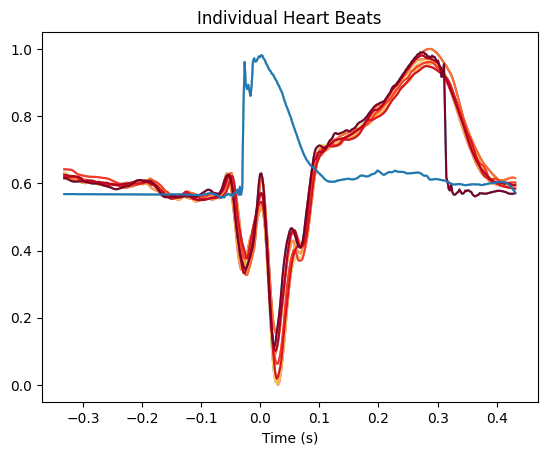

In [8]:
segmented_beats = nk2.ecg_segment(s, rpeaks1, sampling_rate=500, show=True)
# plt.plot(segmented_beats)
print(type(segmented_beats['1']))

sdf = segmented_beats['1']
print(sdf.keys())
# print(sdf['Signal'])
plt.plot(sdf['Signal'])


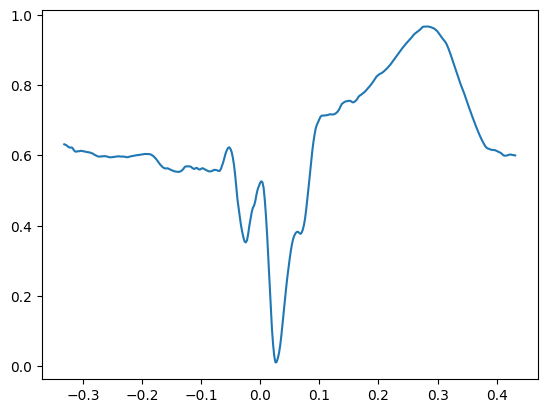

In [9]:
# print(sdf['Index'],sdf['Label'])
plt.plot(segmented_beats['2']['Signal'])

In [21]:
int(list(segmented_beats.keys())[-1])
l = int(list(segmented_beats.keys())[-1])
print(l,list(segmented_beats.keys()))

11 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']


1 <class 'int'>
2 <class 'int'>
3 <class 'int'>
4 <class 'int'>
5 <class 'int'>
6 <class 'int'>
7 <class 'int'>
8 <class 'int'>
9 <class 'int'>
10 <class 'int'>


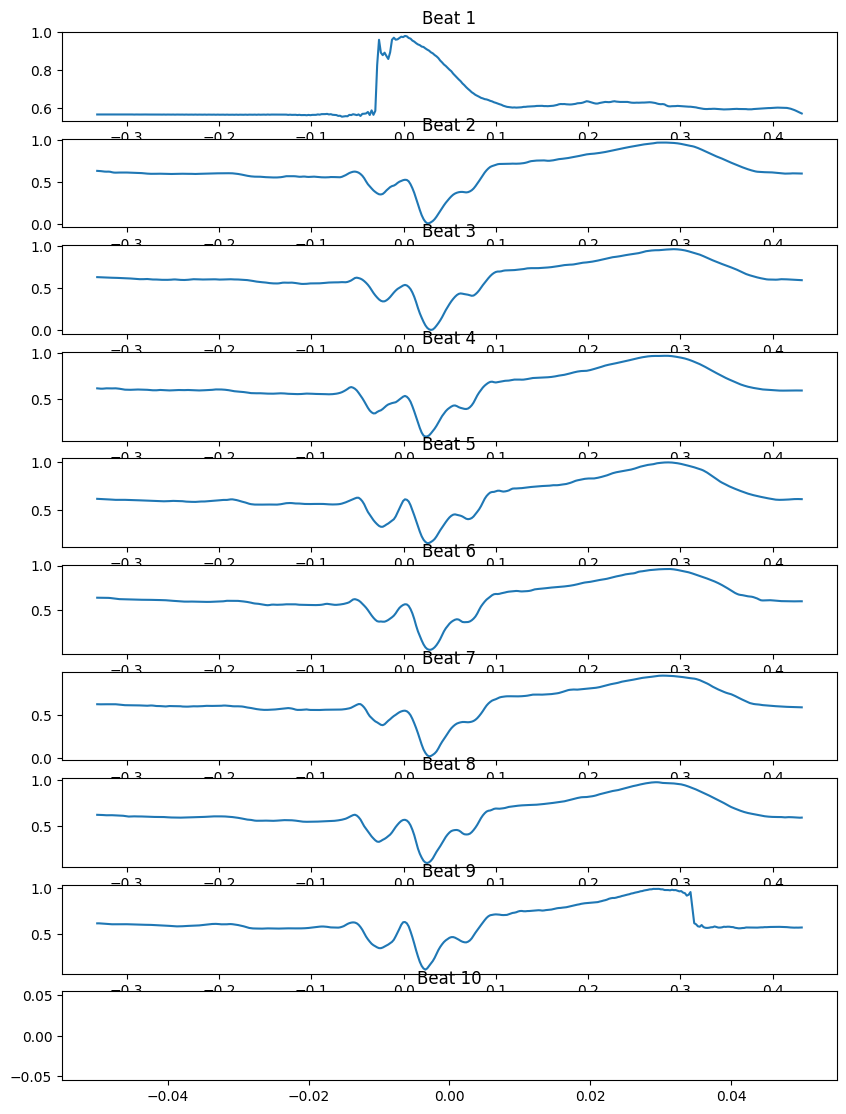

In [11]:
segmented_beats = nk2.ecg_segment(s, rpeaks1, sampling_rate=500, show=False)
plt.figure(figsize=(10, 15))
for i in range(1,l+1):
    plt.subplot(l+1, 1, i+1)
    print(i,type(int(i)))
    # i+=1
    plt.title(f'Beat {i}')
    plt.plot(segmented_beats[str(i)]['Signal'])
plt.show()

In [13]:
print(segmented_beats['11']['Signal'].to_numpy())
plt.plot(segmented_beats['11']['Signal'].to_numpy())

KeyError: '11'

In [28]:
sigg = NORM[0]
temp_beats = []
_, results = nk2.ecg_peaks(sigg, sampling_rate=500)
rpeaks = results["ECG_R_Peaks"]
segmented_beats = nk2.ecg_segment(sigg, rpeaks, sampling_rate=500, show=False)
for i in range(2, int(list(segmented_beats.keys())[-1])):
    signal = segmented_beats[str(i)]['Signal'].to_numpy()
    temp_beats.append(signal)

print(signal.shape, len(temp_beats))

(403,) 9


In [41]:
# segment the heartbeats for all the classes
# discard the first and last beats
# save the segmented beats in a folder

N_beats = []
A_beats = []
count1 = 0
count2 = 0
for i in NORM[:]:
    count1 += 1
    temp_beats = []
    _, results = nk2.ecg_peaks(i, sampling_rate=500)
    rpeaks = results["ECG_R_Peaks"]
    segmented_beats = nk2.ecg_segment(i, rpeaks, sampling_rate=500, show=False)
    for i in range(2, int(list(segmented_beats.keys())[-1])):
        signal = segmented_beats[str(i)]['Signal'].to_numpy()
        temp_beats.append(signal)
    N_beats += temp_beats
    print(f'NORM  : {count1}')
    del temp_beats, signal, segmented_beats, rpeaks, results, _
    gc.collect()
print('NORMAL done')
for i in ARRH[:]:
    count2 += 1
    temp_beats = []
    _, results = nk2.ecg_peaks(i, sampling_rate=500)
    rpeaks = results["ECG_R_Peaks"]
    segmented_beats = nk2.ecg_segment(i, rpeaks, sampling_rate=500, show=False)
    for i in range(2, int(list(segmented_beats.keys())[-1])):
        signal = segmented_beats[str(i)]['Signal'].to_numpy()
        temp_beats.append(signal)
    A_beats += temp_beats
    print(f'ARRHYTHMIA  : {count2}')
    del temp_beats, signal, segmented_beats, rpeaks, results, _
    gc.collect()
print('ARRHYTHMIA done')
print(f'\n\nNormal heartbeats : {len(N_beats)} \nArrhythmic heartbeats : {len(A_beats)}')
print(len(N_beats), len(A_beats))

NORM  : 1
NORM  : 2
NORM  : 3
NORM  : 4
NORM  : 5
NORM  : 6
NORM  : 7
NORM  : 8
NORM  : 9
NORM  : 10
NORMAL done
ARRHYTHMIA  : 1
ARRHYTHMIA  : 2
ARRHYTHMIA  : 3
ARRHYTHMIA  : 4
ARRHYTHMIA  : 5
ARRHYTHMIA  : 6
ARRHYTHMIA  : 7
ARRHYTHMIA  : 8
ARRHYTHMIA  : 9
ARRHYTHMIA  : 10
ARRHYTHMIA done


Normal : 90 
Arrhythmia : 161
90 161


In [42]:
N_beats = np.array(N_beats, dtype = object)
A_beats = np.array(A_beats, dtype = object)

print(N_beats.shape, A_beats.shape)

np.save(r'./Heartbeats/Normal/N_beats.npy', N_beats)
np.save(r'./Heartbeats/Arrhythmia/A_beats.npy', A_beats)

(90,) (161,)


In [44]:
N_beats.shape[0]

90